Well, Its here, spot Vix close below 10. From what i read from the web, people are piling into short vol strategies on an escalating scale. I suspect unwinding of that trade will be rather brutal. I wish good luck to every short vol trader out there and dont forget to wear a helmet :)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy as sp

sns.set(style="whitegrid")
%matplotlib inline

In [7]:
vix = quandl.get("YAHOO/INDEX_VIX", authtoken="ZW3mrFD6ft-vHhH_Fs1y")
vix.index = pd.to_datetime(vix.index)
vix.drop({"Open", "High", "Low", "Close", "Volume"}, inplace=True, axis=1)
vix.columns = ["close"]
vix["pct"] = np.log(vix["close"]).diff()

Lets look at all instances where Vix closed below 10 (if prev close was >= 10)

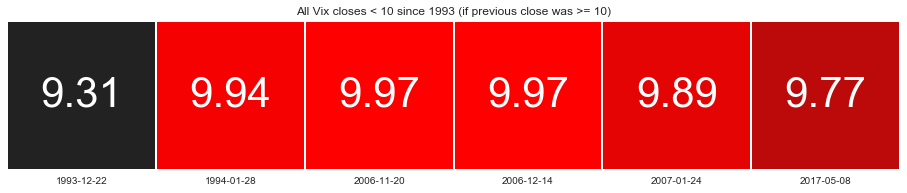

In [58]:
heat = vix[(vix["close"].shift(1) > 10) & (vix["close"] < 10)].transpose().iloc[:1]
heat.columns = heat.columns.map(lambda x: x.strftime("%Y-%m-%d"))

cmap = sns.dark_palette("red", as_cmap=True)

fig, ax = plt.subplots(1, figsize=(16, 9))
ax = sns.heatmap(heat, square=True, cmap=cmap, linewidths=1,
                 annot=True, cbar=False, annot_kws={"size":42}, fmt="g")
ax.axes.get_yaxis().set_visible(False)
plt.title("All Vix closes < 10 since 1993 (if previous close was >= 10)")

Closes below 10 are rare

/Users/ronald/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


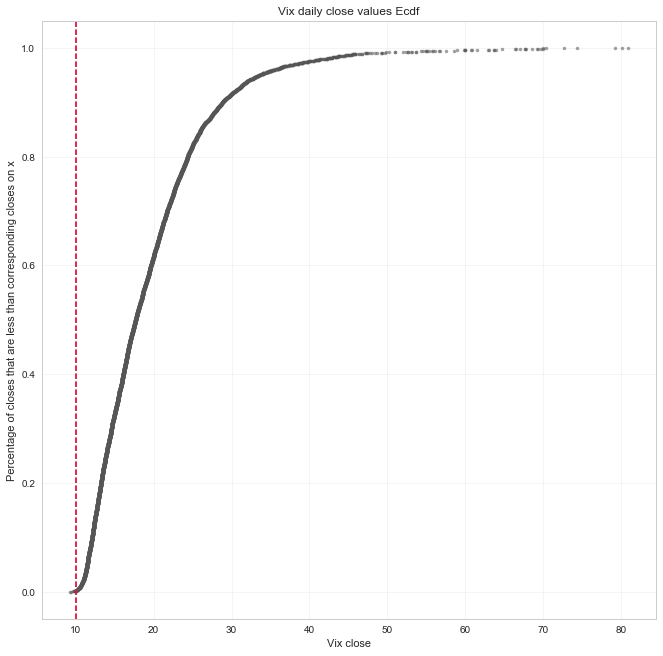

In [63]:
ecd = np.arange(1, len(vix)+1) / len(vix)

plt.figure(figsize=(11, 11))
plt.plot(np.sort(vix["close"]), ecd, linestyle="none", marker=".", alpha=0.55, color="#555555")
plt.axvline(10, linestyle="--", color="crimson")
plt.grid(alpha=0.21)
plt.title("Vix daily close values Ecdf")
plt.xlabel("Vix close")
plt.ylabel("Percentage of closes that are less than corresponding closes on x")
plt.legend(loc="center right")

Nothing to see here

/Users/ronald/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


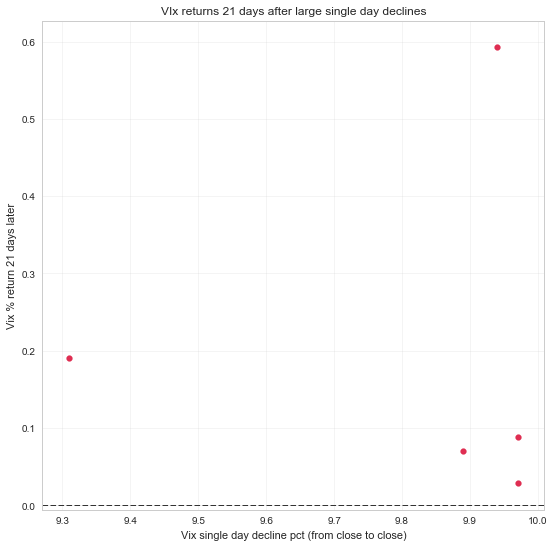

In [56]:
def rets(df, shift):
    out = (df.shift(-shift) / df) - 1
    return out

rets_21 = rets(vix["close"], 21).where((vix["close"].shift(1) >= 10) & (vix["close"] < 10)).dropna()
vix_21 = vix["close"][(vix["close"].shift(1) >= 10) & (vix["close"] < 10)].iloc[:-1]


plt.figure(figsize=(9, 9))
plt.scatter(vix_21, rets_21, color="crimson", alpha=0.89, s=34, label="_nolabel_")
plt.grid(alpha=0.21)
plt.title("VIx returns 21 days after large single day declines")
plt.ylabel("Vix % return 21 days later")
plt.xlabel("Vix single day decline pct (from close to close)")
plt.axhline(linestyle="--", linewidth=1, color="#333333")
plt.legend(loc="upper left")

According to the few past instances, Vix should live’n up in the coming days

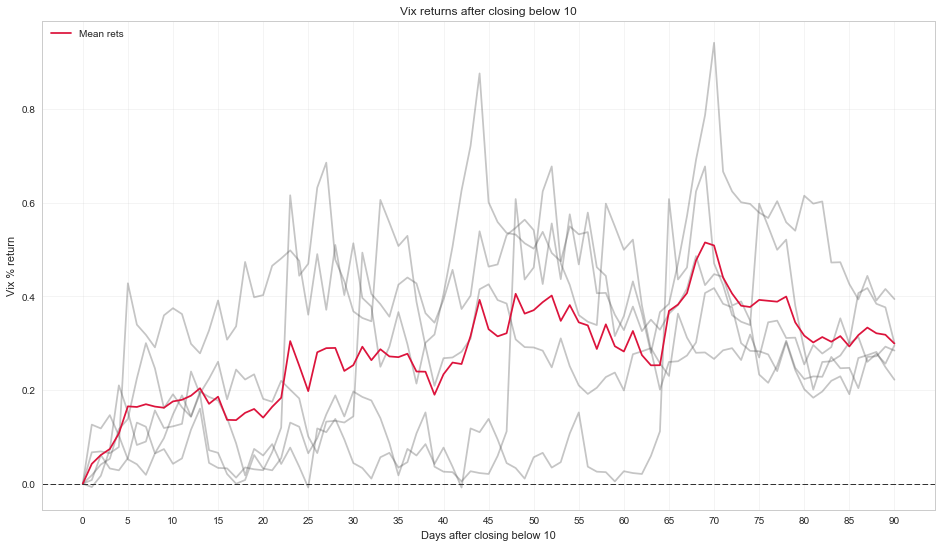

In [62]:
def getRets(df, days):
    df = df.reset_index()
    df_out = pd.DataFrame()
    for index, row in df.iterrows():
        if df["close"].iloc[index-1] >= 10 and df["close"].iloc[index] < 10:
            ret = df["pct"].iloc[index:index+days]
            #ret = np.log(ret).diff()
            ret.iloc[:1] = 0
            ret.reset_index(drop=True, inplace=True)
            df_out[index] = ret
            
    return df_out

vix_21rets = getRets(vix, 90+1)

plt.figure(figsize=(16, 9))
plt.plot(vix_21rets.cumsum(), color="#555555", alpha=0.34, label="_nolegend_")
plt.plot(vix_21rets.mean(axis=1).cumsum(), color="crimson", label="Mean rets")
plt.grid(alpha=0.21)
plt.title("Vix returns after closing below 10")
plt.ylabel("Vix % return")
plt.xlabel("Days after closing below 10")
plt.axhline(linestyle="--", linewidth=1, color="#333333")
plt.xticks(np.arange(0, 90+1, 5))
plt.legend(loc="upper left")

Thanks your time and feel free to leave a comment